- LogisticRegression ROC-AUC SCORE:0.6514
- DecisionTreeClassifier ROC-AUC SCORE:  0.6788
- KNeighborsClassifier ROC-AUC SCORE:  0.5348
- VotingClassifier ROC-AUC SCORE:  0.7180
- RandomForestClassifier ROC-AUC SCORE:  0.8571
- AdaBoostClassifier ROC-AUC SCORE:  0.6767
- GradientBoostingClassifier ROC-AUC SCORE:  0.8622

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv('data/churn_ver02.csv')
np.random.seed(123)
target = churn.Exited
churn = churn.drop(columns='Exited')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(churn, target, test_size=0.3,
                                                   stratify=target)

- XGBoost

In [3]:
import xgboost as XGB # Native XGB
from xgboost import XGBClassifier # Sklearn-Wrapper
from xgboost import XGBRegressor 

In [4]:
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic',
                    learning_rate=0.1, max_depth=8)
evals = [(x_test, y_test)]

In [5]:
xgb.fit(x_train, y_train, eval_metric='auc', eval_set=evals,
        early_stopping_rounds=100, verbose=True)

[0]	validation_0-auc:0.84320
[1]	validation_0-auc:0.84383
[2]	validation_0-auc:0.84433
[3]	validation_0-auc:0.84717
[4]	validation_0-auc:0.84879
[5]	validation_0-auc:0.84674
[6]	validation_0-auc:0.84561
[7]	validation_0-auc:0.84579
[8]	validation_0-auc:0.84664
[9]	validation_0-auc:0.84653
[10]	validation_0-auc:0.84629
[11]	validation_0-auc:0.84575
[12]	validation_0-auc:0.84533
[13]	validation_0-auc:0.84622
[14]	validation_0-auc:0.84654
[15]	validation_0-auc:0.84624
[16]	validation_0-auc:0.84611
[17]	validation_0-auc:0.84618
[18]	validation_0-auc:0.84570
[19]	validation_0-auc:0.84619
[20]	validation_0-auc:0.84549
[21]	validation_0-auc:0.84594
[22]	validation_0-auc:0.84533
[23]	validation_0-auc:0.84519
[24]	validation_0-auc:0.84517
[25]	validation_0-auc:0.84480
[26]	validation_0-auc:0.84515
[27]	validation_0-auc:0.84575
[28]	validation_0-auc:0.84550
[29]	validation_0-auc:0.84554
[30]	validation_0-auc:0.84568
[31]	validation_0-auc:0.84638
[32]	validation_0-auc:0.84669
[33]	validation_0-au

C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[43]	validation_0-auc:0.84696
[44]	validation_0-auc:0.84700
[45]	validation_0-auc:0.84713
[46]	validation_0-auc:0.84708
[47]	validation_0-auc:0.84718
[48]	validation_0-auc:0.84715
[49]	validation_0-auc:0.84716
[50]	validation_0-auc:0.84720
[51]	validation_0-auc:0.84716
[52]	validation_0-auc:0.84683
[53]	validation_0-auc:0.84642
[54]	validation_0-auc:0.84678
[55]	validation_0-auc:0.84660
[56]	validation_0-auc:0.84649
[57]	validation_0-auc:0.84633
[58]	validation_0-auc:0.84647
[59]	validation_0-auc:0.84666
[60]	validation_0-auc:0.84661
[61]	validation_0-auc:0.84640
[62]	validation_0-auc:0.84640
[63]	validation_0-auc:0.84652
[64]	validation_0-auc:0.84664
[65]	validation_0-auc:0.84678
[66]	validation_0-auc:0.84710
[67]	validation_0-auc:0.84677
[68]	validation_0-auc:0.84674
[69]	validation_0-auc:0.84677
[70]	validation_0-auc:0.84676
[71]	validation_0-auc:0.84672
[72]	validation_0-auc:0.84681
[73]	validation_0-auc:0.84671
[74]	validation_0-auc:0.84682
[75]	validation_0-auc:0.84654
[76]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
pred = xgb.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.8487934676048637

In [8]:
xgb.feature_importances_

array([0.04637682, 0.06089722, 0.156026  , 0.04205977, 0.0627797 ,
       0.34215125, 0.04021   , 0.20031066, 0.04918856], dtype=float32)

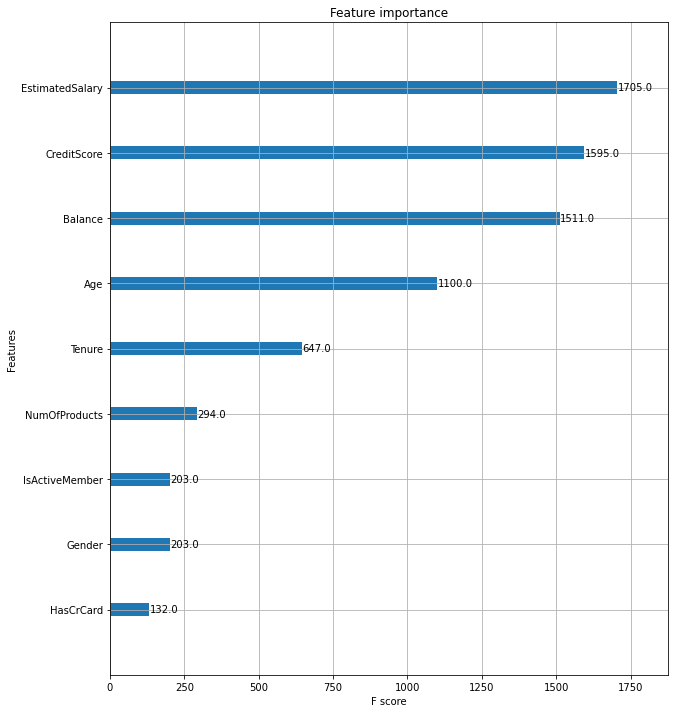

In [7]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax);

- LGBM

In [9]:
from lightgbm import LGBMClassifier # Wrapper-Class
from lightgbm import LGBMRegressor

In [10]:
lgbm = LGBMClassifier(n_estimators=300, objective='binary',
                      learning_rate=0.1, max_depth=8)
lgbm.fit(x_train, y_train, eval_metric='auc', eval_set=evals,
        early_stopping_rounds=100, verbose=True)

[1]	valid_0's auc: 0.835543	valid_0's binary_logloss: 0.473504
[2]	valid_0's auc: 0.843721	valid_0's binary_logloss: 0.451172
[3]	valid_0's auc: 0.845975	valid_0's binary_logloss: 0.433541
[4]	valid_0's auc: 0.848559	valid_0's binary_logloss: 0.419683
[5]	valid_0's auc: 0.847577	valid_0's binary_logloss: 0.408739
[6]	valid_0's auc: 0.850182	valid_0's binary_logloss: 0.39898
[7]	valid_0's auc: 0.849925	valid_0's binary_logloss: 0.391279
[8]	valid_0's auc: 0.851725	valid_0's binary_logloss: 0.384483
[9]	valid_0's auc: 0.852526	valid_0's binary_logloss: 0.378761
[10]	valid_0's auc: 0.853291	valid_0's binary_logloss: 0.374177
[11]	valid_0's auc: 0.852543	valid_0's binary_logloss: 0.370481
[12]	valid_0's auc: 0.853208	valid_0's binary_logloss: 0.367122
[13]	valid_0's auc: 0.854002	valid_0's binary_logloss: 0.363685
[14]	valid_0's auc: 0.853152	valid_0's binary_logloss: 0.361619
[15]	valid_0's auc: 0.852958	valid_0's binary_logloss: 0.359392
[16]	valid_0's auc: 0.853137	valid_0's binary_logl

C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\MOON\AppData\Roaming\Python\Python38\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(max_depth=8, n_estimators=300, objective='binary')

In [11]:
pred = lgbm.predict_proba(x_test)[:,1]
roc_auc_score(y_test,pred)

0.8558799571686652

In [14]:
lgbm.feature_importances_

array([ 91,  44, 141,  38, 180, 116,   4,  46,  90])

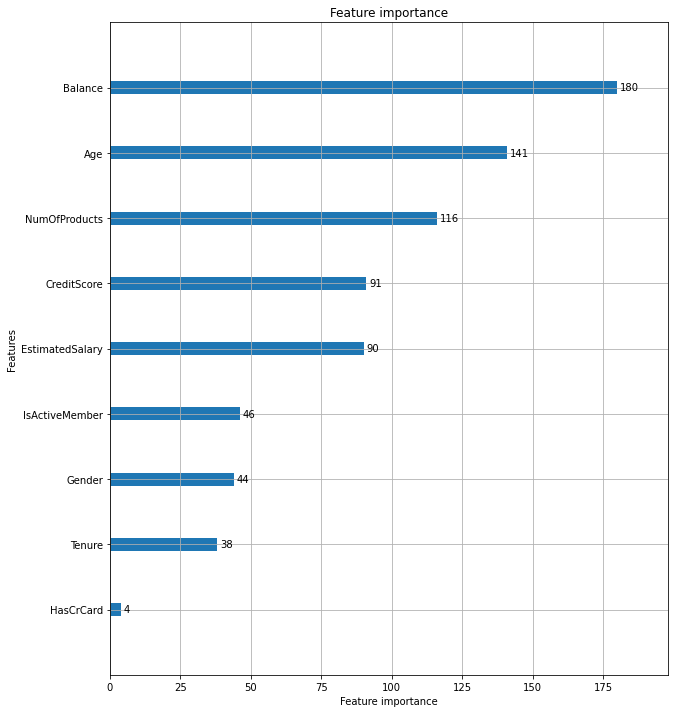

In [12]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax);